<a href="https://colab.research.google.com/github/dikoharyadhanto/Data-Visualization-Documentation/blob/main/004-Pie_Bar_Stacked_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan Dataset**

In [2]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


In [3]:
# Penambahan Kolom Order Month
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id  ... quantity item_price order_month
0   1703458  2019-10-17        14004  ...       10     740000     2019-10
1   1706815  2019-10-24        17220  ...        2     604000     2019-10
2   1710718  2019-11-03        16518  ...        8    1045000     2019-11
3   1683592  2019-08-19        16364  ...        4     205000     2019-08
4   1702573  2019-10-16        15696  ...        2    4475000     2019-10

[5 rows x 10 columns]


In [4]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]


In [5]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


# **Membuat Subset Data**

Misalnya dari data sebelumnya, kita mau fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019, kita filter saja datanya dan disimpan ke dataframe baru.

In [6]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000
6   1711399  2019-11-04        16791  ...    1465000     2019-11  1465000

[5 rows x 11 columns]


# **Membuat Pie Chart**

Misalnya `gmv_per_city_dki_q4`, masukkan datanya ke function `plt.pie()`.
Beberapa parameter yang bisa dimodifikasi:
- `labels`: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
- `colors`: array yang berisikan warna untuk masing-masing bagian pie.
- `autopct`: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.
- `shadow`: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.
- `radius`: jari-jari dari pie-chart

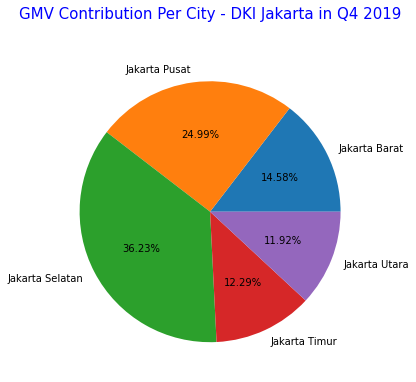

In [7]:
import matplotlib.pyplot as plt
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')
plt.show()

# **Membuat Bar Chart**

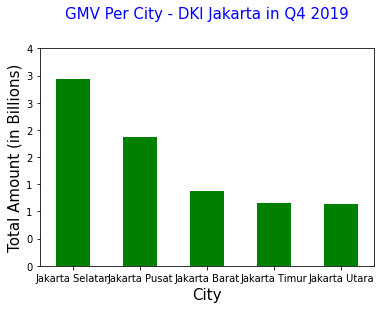

In [8]:
import matplotlib.pyplot as plt
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

# **Membuat Multi-Bar Chart**

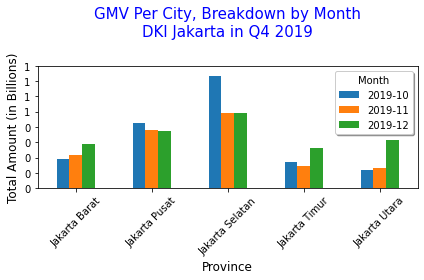

In [9]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Membuat Stacked Chart**

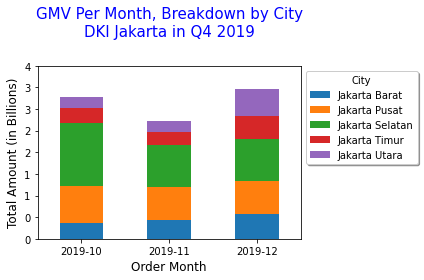

In [10]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',
          loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()